In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data=pd.read_csv("/content/employee.csv")
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [26]:
#Load the data into the pandas environment and identify some basic details of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [27]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [28]:
#Reset the index as "name"
data=pd.read_csv("/content/employee.csv",index_col="name")
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [29]:
#Select rows for specific names Jack Morgan and Josh wills.
data.loc[["Jack Morgan","Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [8]:
#Select data for multiple values "Sales" and “Finance”
data[data["department"].isin(["Sales", "Finance"])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [30]:
#Display employee who has more than 700 performance score.
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [31]:
#Display employee who has more than 500 and less than 700 performance score
data[(data["performance_score"]>500)&(data["performance_score"]<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [32]:
#Check and handle missing values in the dataset
data.isna().sum()


age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [33]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

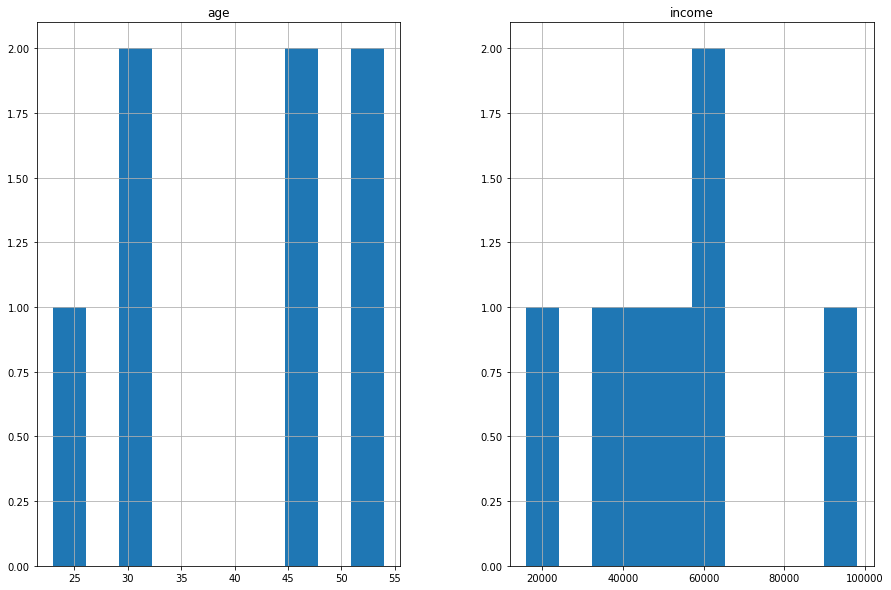

In [34]:
fg=data[["age","income"]]
fg.hist(figsize=(15,10))
plt.show()

In [35]:
data["age"]=data["age"].fillna(data["age"].median())
data.isna().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [36]:
data["income"]=data["income"].fillna(data["income"].median())
data.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [37]:
data["gender"]=data["gender"].fillna(data["gender"].mode()[0])
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

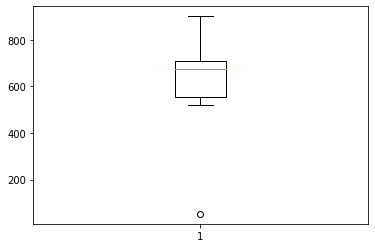

In [38]:
#Check the outliers and handle outliers in performance score using Percentiles
plt.boxplot(data["performance_score"])   
plt.show()

In [39]:
Q1=np.percentile(data["performance_score"],25,interpolation="midpoint")
Q2=np.percentile(data["performance_score"],50,interpolation="midpoint")
Q3=np.percentile(data["performance_score"],75,interpolation="midpoint")
print(Q1,Q2,Q3)

556.0 674.0 711.0


In [40]:
IQR=Q3-Q1
lw_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(lw_lim,up_lim)

323.5 943.5


In [41]:
outliers=[]
for x in data["performance_score"]:
    if (x>up_lim)or(x<lw_lim):
        outliers.append(x)
outliers

[53]

In [42]:
#Check the gender column and do Dummy encoding.
data=pd.get_dummies(data,columns=["gender"])
data

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
James Authur,54.0,52000.0,Operations,G3,53,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


In [43]:
#Do the standard scaling on the feature performance score
data["performance_score"]


name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
James Authur      53
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

In [44]:
from sklearn  import preprocessing
S =preprocessing. StandardScaler()
Std_S = pd.DataFrame(data["performance_score"])
Std_S = S.fit_transform(Std_S)
Std_S = pd.DataFrame(Std_S)
Std_S.describe()

,0
count,9.000000e+00
mean,2.035409e-16
std,1.060660e+00
min,-2.509823e+00
25%,-2.460317e-01
50%,2.850367e-01
75%,4.515581e-01
max,1.306668e+00
